In [1]:
# Setup some Jupyter env features
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
# import
import numpy as np
import photon_correlation_functions as phcor
# plot dat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

rcParams["font.size"] = 16
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";
rc('text', usetex=True)

In [3]:
# nastaveni parametru
Omega = 2 * np.pi * 30e6
decay_rate = 2*np.pi * 21e6
beta = 0.1

# budu plotit zavislost na detuningu
laser_detun = np.linspace(-5,0, 200) * decay_rate

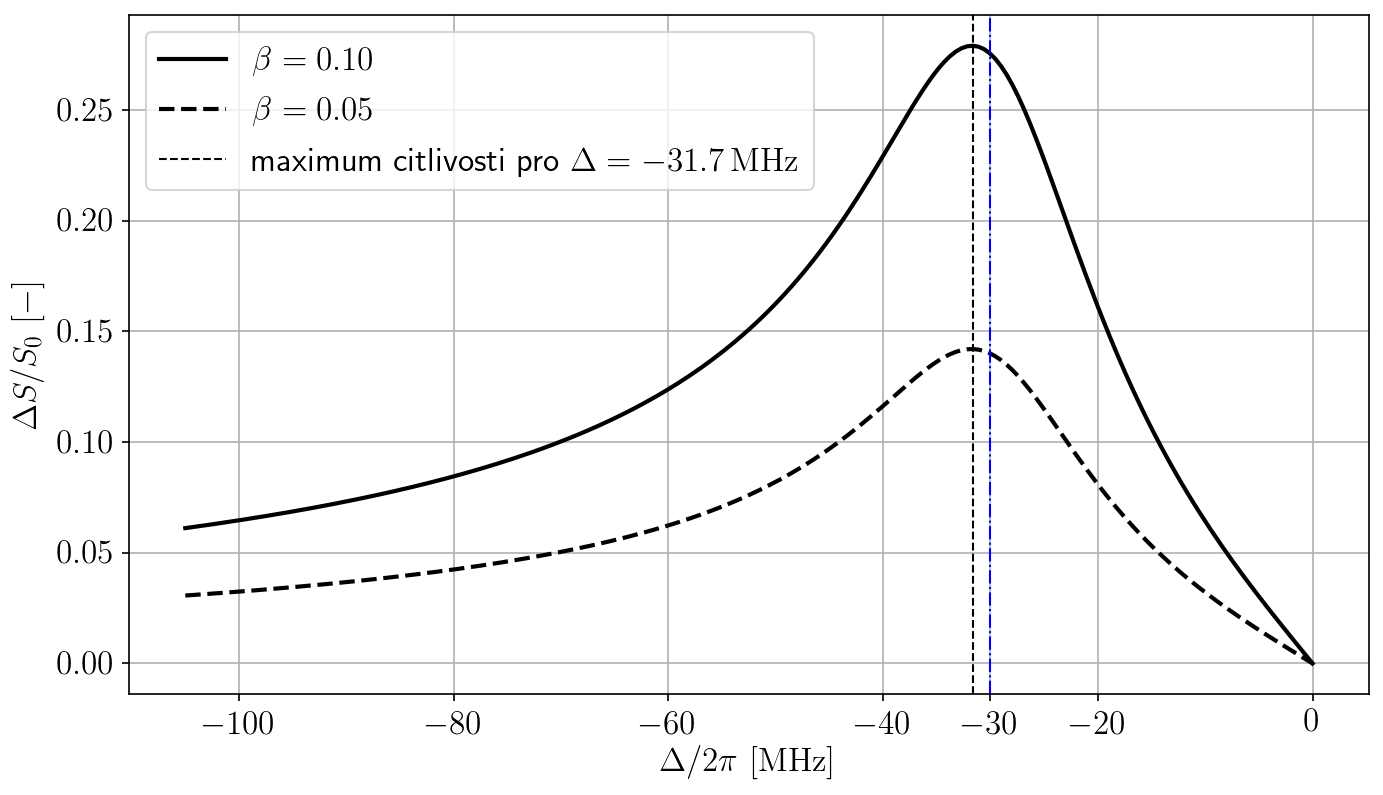

In [5]:
# plot deltaS/S vs detuning
DeltaS_S = np.zeros((200,2))
k = 0
for beta in [0.05, 0.1]:
    DeltaS_S[:,k] = phcor.fl_signal(beta, laser_detun, Omega, decay_rate)
    #A_vs_detun = np.abs( phcor.get_A(decay_rate, laser_detun) )
    k += 1

# najdu max.
detun_max = laser_detun[ np.argmax(DeltaS_S, axis=0)[0] ]

my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
x = plt.gca()

line1 = x.plot(laser_detun/(2*np.pi*1e6), DeltaS_S[:,1], color='black', linewidth=2, label=r"$\beta = {:.2f}$".format(0.1))
line2 = x.plot(laser_detun/(2*np.pi*1e6), DeltaS_S[:,0], color='black', linewidth=2, linestyle='--', label=r"$\beta = {:.2f}$".format(0.05))
#plt.plot(laser_detun/(2*np.pi*1e6), A_vs_detun*5e7)
#plt.plot(laser_detun[ np.argmax(DeltaS_S) ]/(2*np.pi*1e6), max(DeltaS_S), '.')
x.axvline(x=detun_max/(2*np.pi*1e6), linestyle='--', color='black',linewidth=1, 
         label=r"maximum citlivosti pro $\Delta= {:.1f} \, \rm MHz$".format(detun_max/(2*np.pi*1e6)) ) 
#x.axvline(x=-30, linestyle='-.', color='blue',linewidth=1, label=r"nastavovaná hodnota $\Delta = -30\, \rm MHz$")
x.axvline(x=-30, linestyle='-.', color='blue',linewidth=1)

x.set_xlabel(r"$\Delta/2\pi \,\, \rm [MHz]$")
# x.set_ylabel(r"$\frac{\Delta S}{S_0}$")
x.set_ylabel(r"$\Delta S/S_0 \,\, \rm [-]$")

# xticks = x.get_xticks()
# xticks = np.append(xticks, laser_detun[ np.argmax(DeltaS_S) ]/(2*np.pi*1e6))
# x.set_xticks(xticks)

xticks = x.get_xticks()
xticks = sorted( np.append(xticks, -30) )
x.set_xticks(xticks[1:-1 ])

x.legend()
x.grid()
#plt.show()

plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/photcor_sensitivity.svg", bbox_inches="tight")

In [62]:
np.append(xticks, laser_detun[ np.argmax(DeltaS_S) ]/(2*np.pi*1e6))

array([-120.        , -100.        ,  -80.        ,  -60.        ,
        -40.        ,  -20.        ,    0.        ,   20.        ,
        -31.65829146])

In [112]:
np.argmax(DeltaS_S, axis=0)

array([139, 139])